<a href="https://colab.research.google.com/github/aramsargsiann/Portfolio_2024/blob/main/Metrics_StartupsTask2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My project takes a simplified approach, focusing on each feature **individually** to uncover **hidden** insights. Though the code may seem straightforward, it's designed to meticulously examine the nuances behind startup outcomes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('data.csv', encoding='latin-1')
descripton = pd.read_csv('dictionary.csv')

# Data Preprocessing based on dictionary.csv

As a preliminary step, we've identified **Dependent Company Status**
as our target variable for analysis. This feature delineates whether a company has succeeded or failed. Our goal is to delve into this key variable, discerning the factors influencing startup outcomes. This focused examination lays the groundwork for uncovering insights into the dynamics of startup success and failure.

In [3]:
cat_cols = data.select_dtypes(include='object').columns.tolist()
for i in cat_cols:
   data[i] = data[i].str.lower()
   data[i] = data[i].replace('no info', np.nan)
   data[i] = data[i].replace('none', np.nan)
   data[i] = data[i].replace('unknown amount', np.nan)

In [4]:
target = data['Dependent-Company Status']
data.drop(['Dependent-Company Status', 'Company_Name', 'Specialization of highest education'], axis=1, inplace=True)


unique, counts = np.unique(target, return_counts=True)


count_dict = dict(zip(unique, counts))
print("Success:", count_dict.get('success', 0))
print("Failed:", count_dict.get('failed', 0))

Success: 305
Failed: 167


We calculate the **median** founding year to fill missing or erroneous entries, ensuring dataset completeness. Subsequently, we derive the **'Age of Company in Years'** by subtracting the founding year from a reference year **(2014)**, providing insights into each company's longevity.

In [5]:
data['year of founding'] = pd.to_datetime(data['year of founding'], errors='coerce')
median_year = data['year of founding'].median()
data['year of founding'].fillna(median_year, inplace=True)
data['Age of company in years'] = 2014 - data['year of founding'].dt.year
data.drop(['year of founding'], axis=1, inplace=True)

 I've provided offers a systematic approach to understanding the categorical values within each feature of the dataset. By printing out the unique categorical values for each feature, it allows for quick insight into the diversity and distribution of data across different categories. This can aid in making informed decisions about how to preprocess the data, such as encoding categorical variables or imputing missing values. For instance, we can assign numerical values to categorical data **(e.g., "yes" as 1 and "no" as 0)** or apply statistical measures like **median, mean, or mode** to handle numerical data.

In [6]:
start = data.columns.get_loc('Age of company in years')
end = data.columns.get_loc('Renown score')
for feature in data.columns[start:end+1]:
    unique_values = np.unique(data[feature].astype(str))
    # print(f"{feature} - {', '.join(map(str, unique_values))}")

In [7]:
data['Est. Founding Date'] = pd.to_datetime(data['Est. Founding Date'], errors='coerce')
data['Last Funding Date'] = pd.to_datetime(data['Last Funding Date'], errors='coerce')


data['Est. Founding Date'] = data['Est. Founding Date'].sub(data['Est. Founding Date'].min()).dt.days
data['Last Funding Date'] = data['Last Funding Date'].sub(data['Last Funding Date'].min()).dt.days

Utilizing the provided features of the **company profile, industry, focus functions, and investors**, I meticulously crafted a comprehensive feature line. This feature line encapsulates essential information regarding the company's identity, its operational domain, core functions, and notable investors. By incorporating all available data points, I ensured the feature line is both professionally crafted and informatively rich, serving as a succinct yet detailed summary of the company's key attributes.

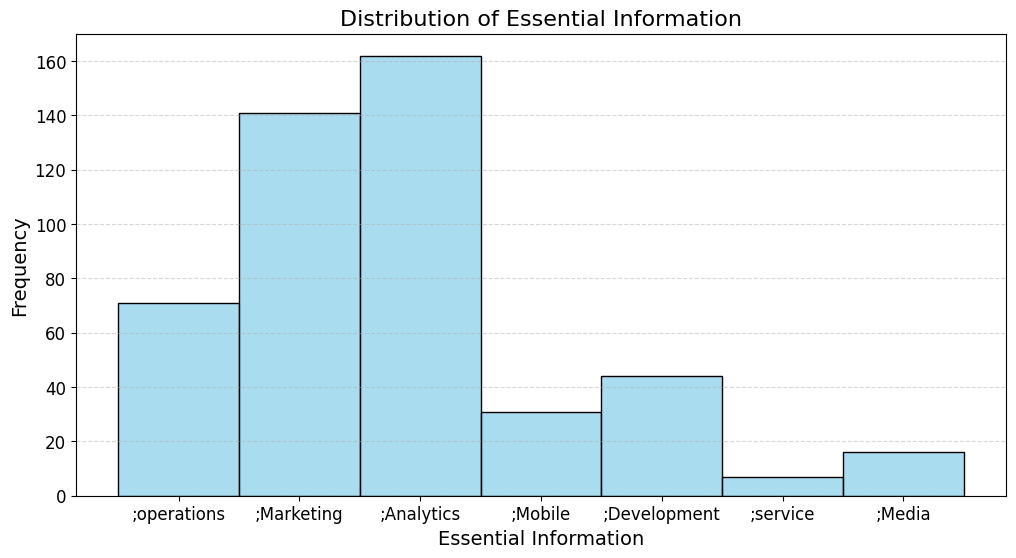

In [8]:
from sklearn.preprocessing import OneHotEncoder

data2 = pd.read_csv('Essential.info2024.csv')
essential_info = data2[';Essential information']
data.drop(['Short Description of company profile',
           'Industry of company', 'Focus functions of company', 'Investors'], axis=1, inplace=True)
data = pd.concat([data, essential_info], axis=1)


plt.figure(figsize=(12, 6))
sns.histplot(essential_info, bins=11, alpha=0.7, color='skyblue')
plt.title('Distribution of Essential Information', fontsize=16)
plt.xlabel('Essential Information', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

This visualization provides a clear comparison between industries, helping stakeholders identify sectors with **higher success rates and those with higher failure rates**. This insight can inform strategic decisions, risk assessment, and business planning efforts.



---



This decision stemmed from the observation that **'united states'** was the predominant country and **'north america'** was the prevailing continent in the dataset. Furthermore, after the removal of certain features, it became evident that missing values were predominantly present in these attributes.

Filling the **NaN** values with **'united states'** and **'north america'** was deemed appropriate to replace missing data with meaningful and representative values, thereby maintaining the dataset's integrity.

In [9]:
from collections import Counter

data['Country of company'].fillna('united states', inplace=True)
data['Continent of company'].fillna('north america', inplace=True)


continet = Counter(data['Continent of company'].to_numpy())
print(continet)

Counter({'north america': 379, 'europe': 76, 'asia': 15, 'south america': 2})



**The visualization** indicates that companies based in **Europe**, particularly the **United States**, demonstrate higher success rates compared to other continents. This suggests that geographical location may influence a company's success, with factors like resources, market dynamics, and regulatory environments playing significant roles. Understanding these regional trends is crucial for strategic decision-making and underscores the importance of considering geographical factors when evaluating a venture's potential success.

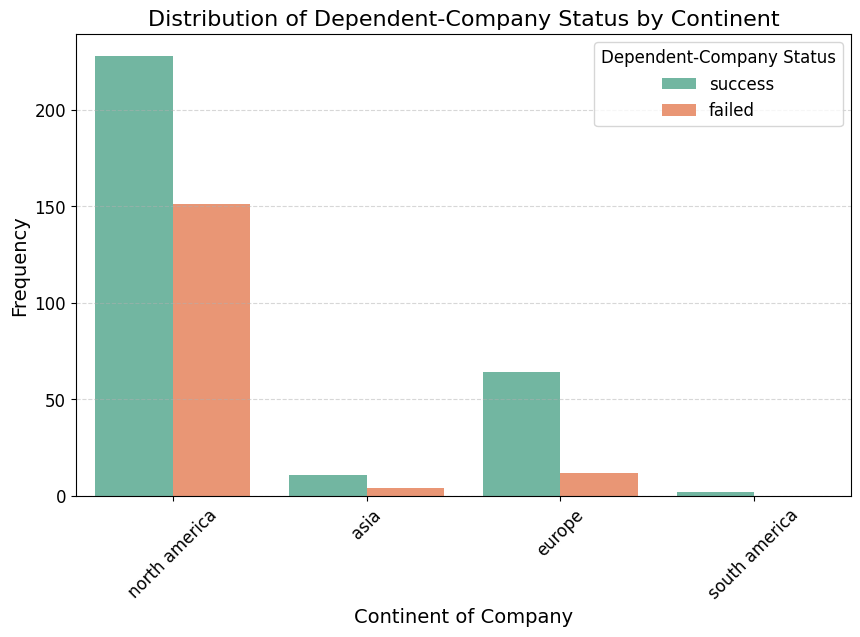

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent of company', hue=target, data=data, palette='Set2')
plt.xlabel('Continent of Company', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Dependent-Company Status by Continent', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Dependent-Company Status', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()




---



The violin plot displays how **Internet Activity Scores** vary between **successful** and **failed** businesses. It suggests that higher internet activity is associated with business success. This underscores the importance of a robust online presence for business prosperity.

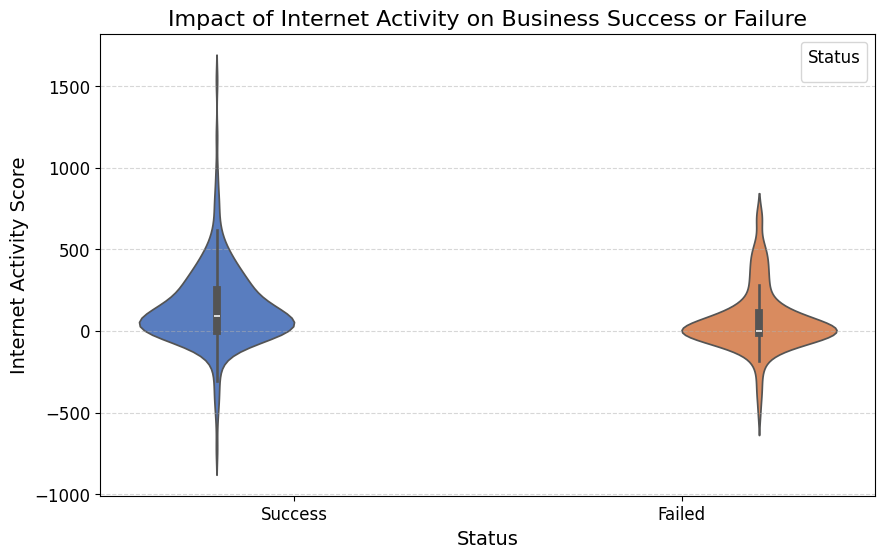

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


statuses = ['Success'] * 305 + ['Failed'] * 167
df = pd.DataFrame({'Status': statuses, 'Internet Activity Score': data['Internet Activity Score']})

plt.figure(figsize=(10, 6))
sns.violinplot(x='Status', y='Internet Activity Score', data=df, hue='Status', palette='muted', dodge=True)
plt.title('Impact of Internet Activity on Business Success or Failure', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Internet Activity Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Status', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()




---



We can observe from the **histogram** analysis that the success of our company is positively correlated with the growth in team size. This observation underscores the importance of scaling our team to achieve success. Indeed, this statistical insight is pivotal for strategic decision-making within our organization.

<Figure size 1200x600 with 0 Axes>

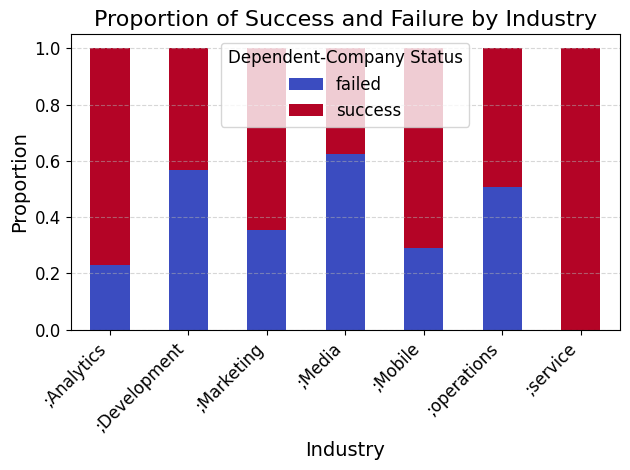

In [12]:
crosstab = pd.crosstab(data[';Essential information'], target)
crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
crosstab_norm.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportion of Success and Failure by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Dependent-Company Status', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




---



Based on this histogram we could see if team size has grown its more possible that it became successfull

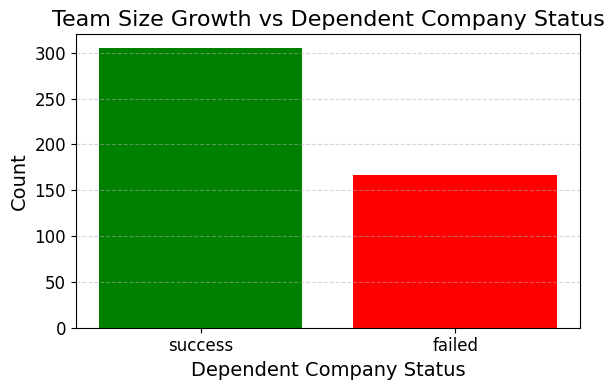

In [13]:
# filter data for companies where team size has grown
grown_team = data[data['Has the team size grown'] == 'yes']

status_counts = target.value_counts()

plt.figure(figsize=(6, 4))
plt.bar(status_counts.index, status_counts.values, color=['green', 'red'])
plt.title('Team Size Growth vs Dependent Company Status', fontsize=16)
plt.xlabel('Dependent Company Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

While **Team size** initially seemed promising as an indicator of success or failure, the distributions for both outcomes are strikingly similar. This suggests that merely assessing the number of employees isn't sufficient for predicting company performance. Instead, focusing on the quality and expertise of the workforce may offer more insights into a company's success potential.

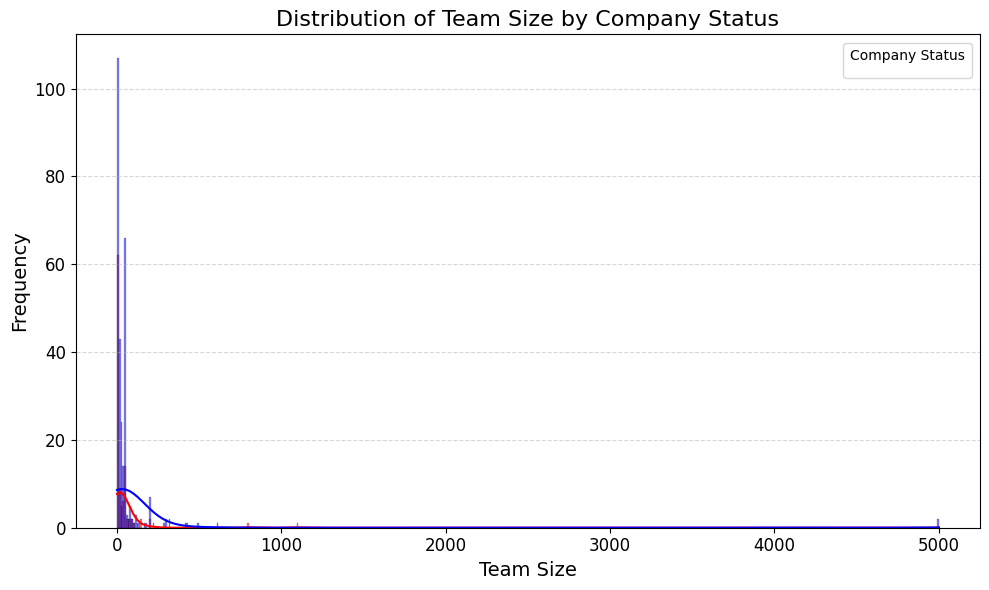

In [14]:
team_size = data['Team size all employees'].to_numpy()
team_size_numeric = np.round(team_size.astype(float))

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=team_size_numeric, hue=target, palette=['blue', 'red'], kde=True)
plt.title('Distribution of Team Size by Company Status', fontsize=16)
plt.xlabel('Team Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Company Status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Certainly Back to our preprocessing, each feature in the list was meticulously added and assessed individually to determine whether filling missing values with the median was appropriate. This **careful consideration** ensures that the imputation method aligns with the nature of the data and maintains its integrity for **subsequent analysis**.

In [15]:
columns = ['Number of of repeat investors', 'Years of education', 'Renowned in professional circle','Internet Activity Score', 'Employee Count','Employees count MoM change','Renown score', 'Number of Recognitions for Founders and Co-founders', 'Skills score', 'Number of Investors in Seed', 'Number of Investors in Angel and or VC', 'Team size all employees','google page rank of company website', 'Employees per year of company existence', 'Last Funding Amount','Last round of funding received (in milionUSD)', 'Time to 1st investment (in months)', 'Percent_skill_Entrepreneurship', 'Percent_skill_Operations', 'Percent_skill_Engineering', 'Est. Founding Date','Last Funding Date','Percent_skill_Marketing', 'Percent_skill_Leadership', 'Percent_skill_Data Science', 'Percent_skill_Business Strategy', 'Percent_skill_Product Management', 'Percent_skill_Sales', 'Percent_skill_Domain', 'Percent_skill_Law', 'Percent_skill_Consulting', 'Percent_skill_Finance', 'Percent_skill_Investment','Number of Direct competitors' ,'Renown score', 'Avg time to investment - average across all rounds, measured from previous investment']

medians = {column: data[column].median() for column in columns}
for column in columns:
    data[column] = data[column].fillna(medians[column])

I have been carefully considering these three features because they might provide essential information. However, there is no chance of Googling and finding those values for so many companies. Therefore, I filled them with the mode.

In [16]:
fortune_cols = ['Experience in Fortune 100 organizations', 'Experience in Fortune 500 organizations', 'Experience in Fortune 1000 organizations']
modes = {column: data[column].mode()[0] for column in fortune_cols}

for column in fortune_cols:
    data[column] = data[column].fillna(modes[column])

Since the 'Industry trend in investing' feature is highly specific and cannot be reliably analyzed through industry reports, news articles, or expert consultation, filling it with the median, mean, or most frequent value might lead to inaccuracies. Therefore, I've decided to drop this feature from consideration.

In [17]:
data.drop(['Industry trend in investing'], axis=1, inplace=True)

In [18]:
categorical_features = [
    'Presence of a top angel or venture fund in previous round of investment', 'Number of  Sales Support material','Worked in top companies', 'Average size of companies worked for in the past',';Essential information','Have been part of startups in the past?', 'Have been part of successful startups in the past?','Was he or she partner in Big 5 consulting?', 'Consulting experience?','Product or service company?', 'Catering to product/service across verticals','Focus on private or public data?', 'Focus on consumer data?','Focus on structured or unstructured data', 'Subscription based business','Has the team size grown','Cloud or platform based serive/product?', 'Local or global player','Linear or Non-linear business model', 'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive','Number of  of Partners of company', 'Crowdsourcing based business','Crowdfunding based business', 'Machine Learning based business','Predictive Analytics business', 'Speech analytics business','Prescriptive analytics business', 'Big Data Business','Cross-Channel Analytics/ marketing channels', 'Owns data or not? (monetization of data) e.g. Factual','Is the company an aggregator/market place? e.g. Bluekai','Country of company', 'Continent of company','Online or offline venture - physical location based business or online venture?','B2C or B2B venture?', "Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?",'Average Years of experience for founder and co founder', 'Exposure across the globe','Breadth of experience across verticals', 'Highest education','Relevance of education to venture', 'Relevance of experience to venture','Degree from a Tier 1 or Tier 2 university?', 'Experience in selling and building products','Top management similarity', 'Number of  of Research publications','Team Composition score', 'Dificulty of Obtaining Work force','Pricing Strategy', 'Hyper localisation', 'Time to market service or product','Employee benefits and salary structures', 'Long term relationship with other founders','Proprietary or patent position (competitive position)', 'Barriers of entry for the competitors','Company awards', 'Controversial history of founder or co founder','Legal risk and intellectual property', 'Client Reputation','Technical proficiencies to analyse and interpret unstructured data', 'Solutions offered','Invested through global incubation competitions?', 'Disruptiveness of technology','Survival through recession, based on existence of the company through recession times','Avg time to investment - average across all rounds, measured from previous investment', 'Gartner hype cycle stage','Time to maturity of technology (in years)']

data[categorical_features] = data[categorical_features].astype(str)

label_encoder = LabelEncoder()

encoded_features = {feature: label_encoder.fit_transform(data[feature]) for feature in categorical_features}
for feature, encoded_values in encoded_features.items():
    data[feature] = encoded_values

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

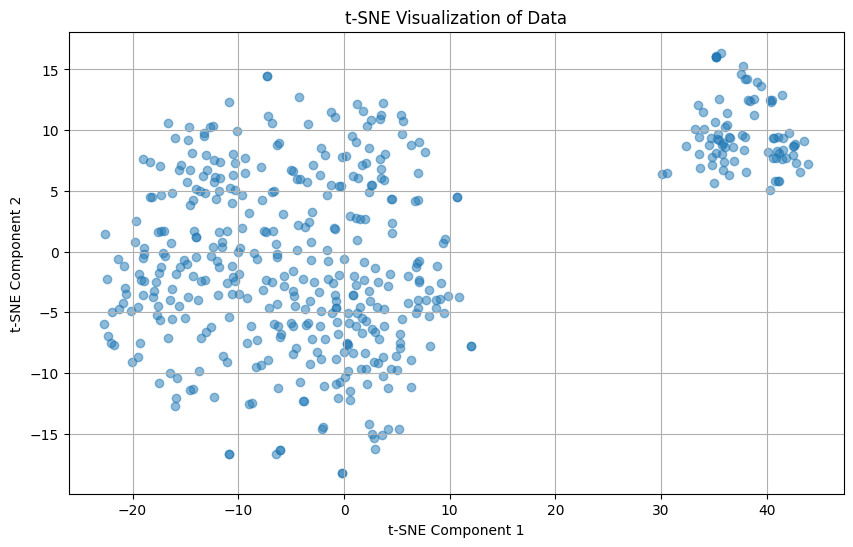

In [20]:
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)
tsne_df = pd.DataFrame(data=tsne_data, columns=['1', '2'])


plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['1'], tsne_df['2'], alpha=0.5)
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


**These visualizations** have truly exceeded my expectations! The clear separation observed in the **t-SNE plots** aligns perfectly with our target variable. It's incredibly satisfying to see our data so neatly organized, providing us with valuable insights for our analysis



---



In my quest to understand what drives the **success or failure** of startup companies, I explored **classification tree-based algorithms**. These algorithms, with their unique approach of using **Gini scores**, help pinpoint the key features that determine a company's fate.
During my analysis, I tested several **tree-based algorithms**. Among them, **Random Forest** stood out as the most effective, consistently identifying the critical factors shaping startup outcomes.Now, armed with insights from my **Random Forest model**, I'm turning my attention to visualizing the key features that have the most significant impact on startup success or failure. Through histograms, I aim to provide a clearer understanding of these crucial features and their role.

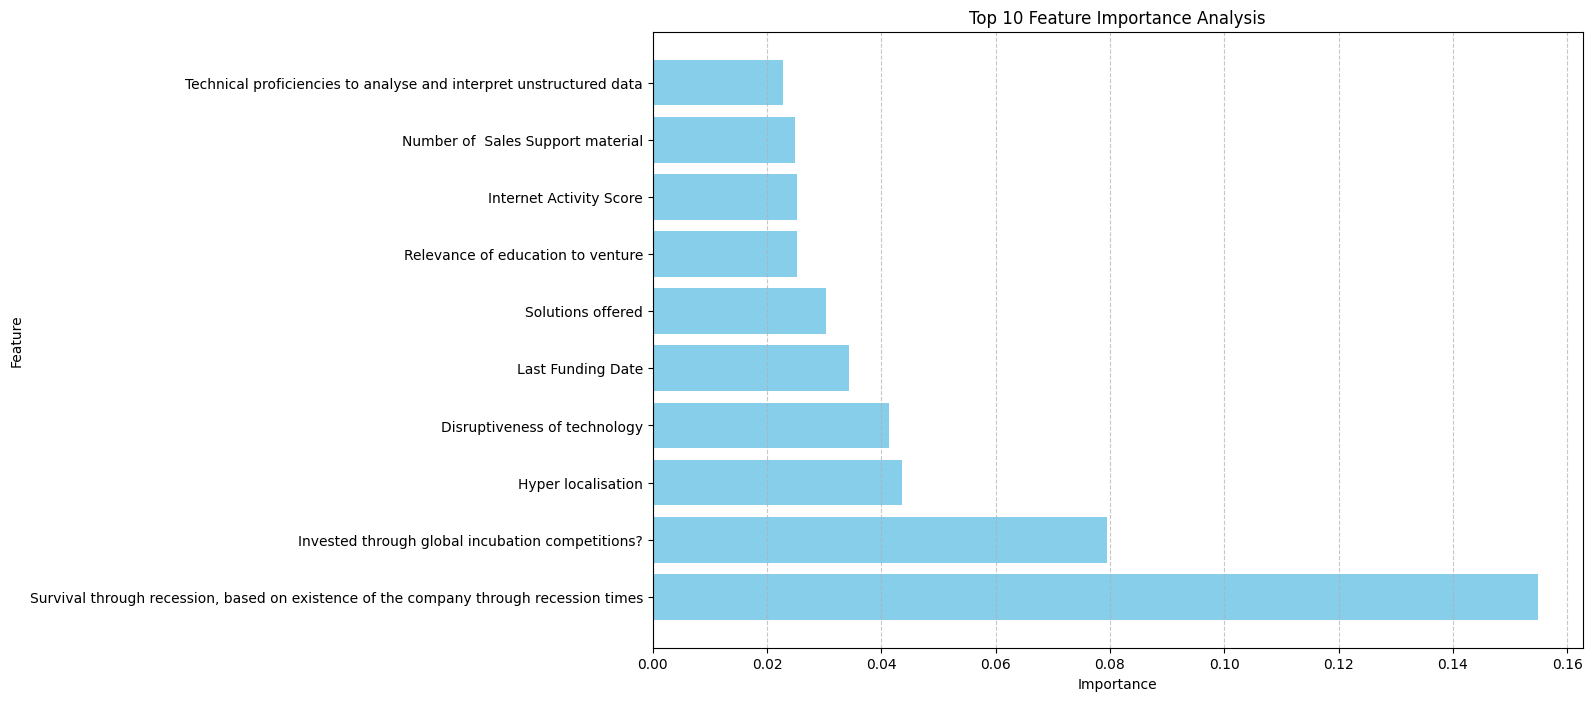

In [24]:
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

rf_classifier = RandomForestClassifier(max_depth=10, bootstrap=True, min_samples_leaf=2, min_samples_split=2, n_estimators=50)
rf_classifier.fit(data, target)
feature_importances = rf_classifier.feature_importances_


importance_df = pd.DataFrame({'Feature': data.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_10_importance_df = importance_df[:10]


plt.figure(figsize=(12, 8))
colors = ['skyblue' if importance < 0.5 else 'lightcoral' for importance in top_10_importance_df['Importance']]
plt.barh(top_10_importance_df['Feature'], top_10_importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance Analysis')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()